# [Analysis] Cooling
Goal: Model a real-world system (the cooling of a hot drink) with a differential equation. 

## Part 1: Experimentation
I filled a cup of water with hot water at 60°C (measured with a food thermometer). Ambient temperature stayed around 22.7°C for the duration of the experiment.

Every minute for the first hour, I recorded the temperature of the drink. After that, as the cooling slowed, I switched to 2-minute intervals, then 3, 5, 10, 20, and finally 30. The intervals weren't entirely accurate, as I often lost around 5-10 seconds getting a reading between intervals. But the overall results should be largely unaffected.

## Part 2: Visualization

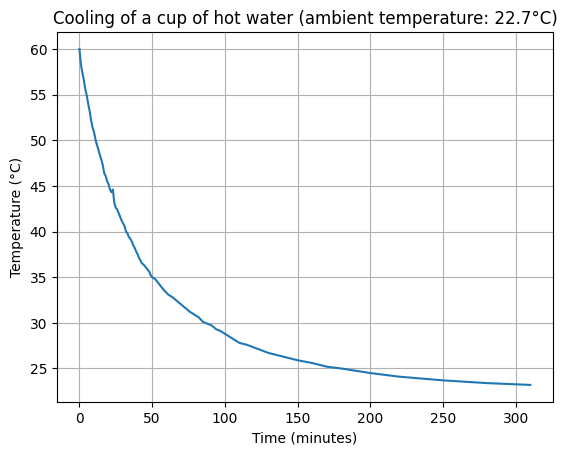

In [18]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('fixtures/cooling.csv') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    rows = list(csvreader)
    minutes = [r['minute'] for r in rows]
    temperatures = [r['temperature'] for r in rows]
    plt.plot(minutes, temperatures)

plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Cooling of a cup of hot water (ambient temperature: 22.7°C)')
    
    

Text(0.5, 1.0, 'Cooling of a cup of hot water (ambient temperature: 22.7°C)')

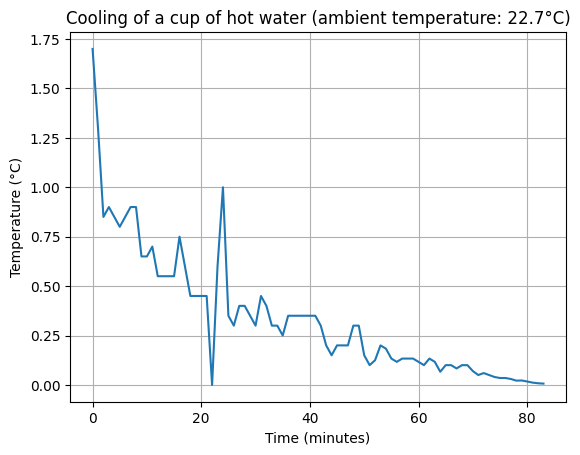

In [20]:
plt.plot(np.abs(np.gradient(temperatures, minutes)))
plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('dT/dt vs t')

## Part 3: Analysis
$$ dT/dt = -k(T - T_{ambient}) $$
$$ \Rightarrow dT/(T - T_a) = -k dt $$

Integrating both sides:
$$ \Rightarrow  \ln(T - T_a) = -kt + c $$
$$ \Rightarrow  T - T_a = C.e^{-kt} $$
$$ \Rightarrow  T = 22.7 + C.e^{-kt} $$

To find C, set t=0 and T(0) = 60.
$$ \Rightarrow 60 = 22.7 + C \Rightarrow C = 37.3 $$

To find k, we can use t=1 and T(1) = 58.3
=> 58.3 = 22.7 + 37.3.e^-k
=> k = 0.04665

Thus, T = 22.7 + 37.3.e^-.04665t

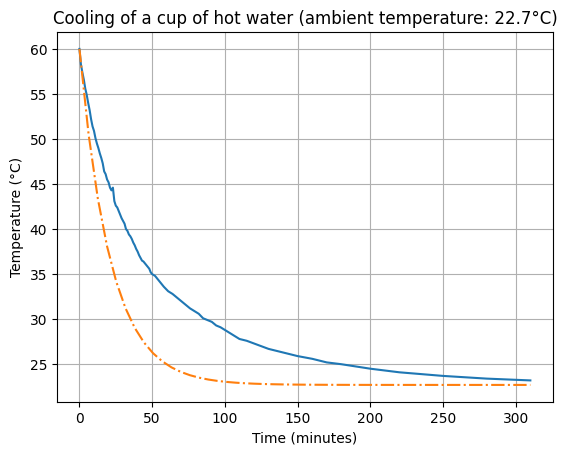

In [16]:
t = np.linspace(0, 310)
k = 0.04665
T = 22.7 + 37.3*np.exp(-k*t)
plt.plot(minutes, temperatures)
plt.plot(t, T, '-.')
plt.grid(True)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Measured vs expected cooling of a cup of hot water (T_a = 22.7°C)')



## Personal thoughts
I knew what to expect, but it's still super cool to see and do this in person!